# 1.Problem Statement
  In this project i have to develop stack overflow search engine based on semantic meaning so when user search any question on search engine then it should give relevant and and semantically most similar results.
  In order to understand data i need following:

    1. Title
    2. Question body
    3. Answer of the question
    4. Votes of each answers

# 2. Business Objective
    1. We have to find top n result based in semantic similariy and it should be most relevant to user's requirements.
    2. Top results should be based on both question and answer, that means if user search for any question then in top results it can be most relevant answer or it can be most similar question that other have asked.

# 2. Business Constraints
    1. Low latency Requirement.
    2. Search engine should display Most relevant result.

# 3.Data Collection
1. Google BigQuery dataset includes an archive of stackoverflow contents.it includes posts, votes, tags and badges.This dataset is also available on stack exchange internet archive, here is link : https://archive.org/details/stackexchange
, For more understanding, Data is also availabe on kaggle, link: https://www.kaggle.com/stackoverflow/stackoverflow

2. i will obtain data by using GoogleBigQuery for that we have to create project on GCP to get project ID and Google Application credentials.

3. Dataset contains many tables but we only use 'post_question' and 'post_answer' tables.
  * post_question contains fields like, question_id, title, body, creation date etc..
  * post_answer has fields like, answer_id, answer body, comment count,creation date etc

4. We will join these 2 tables on id's of question and answer and we will get
id, title, Question body, question answer and votes for the answer and i will restrict data only for python and sports related question

5. To get data from google cloud dataset we should have google cloud account and have to use google's big query

6. Using googles's big query we will get the data and store it to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Authenticate google account for acces google public dataset
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
from google.cloud import bigquery

In [ ]:
# project id which we can get from GCP
project_id = 'stackoverflowdata-450614'

In [ ]:
# Google credentials which we can get fromGCP as json file and store it to drive
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/StackOverflowData/pretrain_data/stackoverflowdata-450614-4d9ab32e59a2.json"

In [ ]:
client = bigquery.Client()
dataset_reference = client.dataset('stackoverflow', project='bigquery-public-data')
dataset = client.get_dataset(dataset_reference)

In [ ]:
# list of tables availbale in stackoverflow dataset
# reference : https://www.kaggle.com/fluffyhamster/stack-overflow-data
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)

badges
comments
post_history
post_links
posts_answers
posts_moderator_nomination
posts_orphaned_tag_wiki
posts_privilege_wiki
posts_questions
posts_tag_wiki
posts_tag_wiki_excerpt
posts_wiki_placeholder
stackoverflow_posts
tags
users
votes


In [ ]:
# we will only use post question and post question tables for joining.

In [ ]:
# The pandas-gbq library is a community led project by the pandas community.
# It covers basic functionality, such as writing a DataFrame to BigQuery and running a query,
# but as a third-party library it may not handle all BigQuery features or use cases.
# reference: https://colab.research.google.com/notebooks/bigquery.ipynb#scrollTo=oKNxsRvuKtAz

df = pd.io.gbq.read_gbq('''
  SELECT q.id, q.title, q.body, q.tags, a.body as answers,
  a.score FROM `bigquery-public-data.stackoverflow.posts_questions` AS q
  INNER JOIN `bigquery-public-data.stackoverflow.posts_answers` AS a
  ON q.id = a.parent_id
  WHERE q.tags LIKE '%java%'
  LIMIT 2000000
  ''', project_id=project_id, dialect='standard')

<ipython-input-10-067313dbcc57>:6: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.io.gbq.read_gbq('''
/usr/local/lib/python3.11/dist-packages/pandas/io/gbq.py:207: LargeResultsWarning: Recommendation: Your results are 4.8 GiB. Consider using BigQuery DataFrames (https://bit.ly/bigframes-intro)to process large results with pandas compatible APIs with transparent SQL pushdown to BigQuery engine. This provides an opportunity to save on costs and improve performance. Please reach out to bigframes-feedback@google.com with any questions or concerns. To disable this message, run warnings.simplefilter('ignore', category=pandas_gbq.exceptions.LargeResultsWarning)
  return pandas_gbq.read_gbq(


In [ ]:
# df = pd.io.gbq.read_gbq('''
#   SELECT
#   q.id AS id,
#   q.title AS title,
#   q.body AS body,
#   q.tags AS tags,
#   answer_with_highest_score.answer_body AS answers,
#   q.score AS score
# FROM
#   `bigquery-public-data.stackoverflow.posts_questions` q
# LEFT JOIN (
#   SELECT
#     parent_id,
#     (ARRAY_AGG(STRUCT(body AS answer_body, score AS answer_score) ORDER BY score DESC LIMIT 1))[OFFSET(0)] AS answer_with_highest_score
#   FROM
#     `bigquery-public-data.stackoverflow.posts_answers`
#   GROUP BY
#     parent_id
# ) a
# ON
#   q.id = a.parent_id
# ORDER BY
#   q.score DESC
# LIMIT
#   1000000;

#   ''', project_id=project_id, dialect='standard')

<ipython-input-9-43e3ca841d0b>:1: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.io.gbq.read_gbq('''


GenericGBQException: Reason: 400 GET https://bigquery.googleapis.com/bigquery/v2/projects/stackoverflowdata-450614/queries/job_UYuciaM3i4v7KyxchlZOhJtpYC34?maxResults=0&location=US&prettyPrint=false: Resources exceeded during query execution: The query could not be executed in the allotted memory. Peak usage: 100% of limit.
Top memory consumer(s):
  ORDER BY operations: 98%
  other/unattributed: 2%


Location: US
Job ID: job_UYuciaM3i4v7KyxchlZOhJtpYC34


In [ ]:
df.head()

,id,title,body,tags,answers,score
0,5701633,Java exit a program without quitting JVM,<p>I want to exit a java process and free all ...,java|jvm,<p>There is one JVM process per running Java a...,9
1,17913681,How do I use .toLocaleTimeString() without dis...,<p>I'm currently attempting to display the use...,javascript|time,<p>With locales :</p>\n\n<pre><code>var date =...,11
2,38082965,Symbol.species example from MDN not making sense?,<p>I was just translating an article about <a ...,javascript,<p>You are missing an important detail. If you...,14
3,41058998,Spark: How RDD.map/mapToPair work with Java,"<p>I have some pairs cw (Integer i, String wor...",java|apache-spark|tuples|rdd|keyvaluepair,"<p>If I understand you correctly, you have bel...",10
4,52228470,Exception in JPA when using seed file for Post...,"<p>I am using Spring Boot 2 with JPA, and I le...",java|spring|postgresql|hibernate|jpa,"<p>The problem was not the syntax, because the...",12


In [ ]:
# we have taken 500000 rows
df.shape

(2000000, 6)

In [ ]:
file_path = "/content/drive/MyDrive/StackOverflowData/stackoverflow_data_final.csv"
df.to_csv(file_path, index=False)
print(f"File đã được lưu tại: {file_path}")

File đã được lưu tại: /content/drive/MyDrive/StackOverflowData/stackoverflow_data_final.csv


## Data Analysis and EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/StackOverflowData/stackoverflow_data_final.csv')
df

,id,title,body,tags,answers,score
0,5701633,Java exit a program without quitting JVM,<p>I want to exit a java process and free all ...,java|jvm,<p>There is one JVM process per running Java a...,9
1,17913681,How do I use .toLocaleTimeString() without dis...,<p>I'm currently attempting to display the use...,javascript|time,<p>With locales :</p>\n\n<pre><code>var date =...,11
2,38082965,Symbol.species example from MDN not making sense?,<p>I was just translating an article about <a ...,javascript,<p>You are missing an important detail. If you...,14
3,41058998,Spark: How RDD.map/mapToPair work with Java,"<p>I have some pairs cw (Integer i, String wor...",java|apache-spark|tuples|rdd|keyvaluepair,"<p>If I understand you correctly, you have bel...",10
4,52228470,Exception in JPA when using seed file for Post...,"<p>I am using Spring Boot 2 with JPA, and I le...",java|spring|postgresql|hibernate|jpa,"<p>The problem was not the syntax, because the...",12
...,...,...,...,...,...,...
1999995,9467520,Why does JavaMail use System.getProperties() ?,<p>Why do we need to add the properties like <...,java|jakarta-mail|system-properties,<p>You don't actually need to add them to the ...,8
1999996,15392699,How to get the input from a JFrame form?,<p>I am trying to get the input that I submit ...,java|swing|jframe|jtextfield|springlayout,<p>To do this your <code>createAndShowGUI</cod...,8
1999997,8582858,15 puzzle game in java,<p>I am creating a 15 puzzle game in java. I h...,java|swing|actionlistener,<p>I think your best bet would be to keep the ...,8
1999998,4135516,JVM signal chaining SIGPIPE,<p>We have a C++ application with an embedded ...,java|c++|linux|multithreading|signals,<p>The JVM can't tell whether the SIGPIPE came...,8


In [ ]:
# print dataframe info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 6 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   id       int64 
 1   title    object
 2   body     object
 3   tags     object
 4   answers  object
 5   score    int64 
dtypes: int64(2), object(4)
memory usage: 91.6+ MB


In [ ]:
# we have no null values in any of the columns

In [ ]:
# checking for null values
df.isna().sum()

,0
id,0
title,0
body,0
tags,0
answers,0
score,0


In [ ]:
# checking for duplicate values
df.duplicated().any()

True

In [ ]:
# checking for duplicate values
print(df.duplicated('id').any())
print(df.duplicated('title').any())
print(df.duplicated('body').any())
print(df.duplicated('tags').any())
print(df.duplicated('answers').any())

True
True
True
True
True


## Data aggregation
    1. As we can se here are some duplicate rows in dataframe.
    2. so i will concatnate  answers based on duplicate id.
    3. i will sum up score also based on duplicate id.

In [ ]:
# create corpus
# combine answers and take sum of votes with duplicate id,questions,title and tags
aggregated = {'answers': lambda x: "\n".join(x), 'score': 'sum'}
# aggregate df
grouped = df.groupby(['id','title', 'body','tags'],as_index=False).agg(aggregated)
# make dataframe
final_deduplicate_df = pd.DataFrame(grouped)

In [ ]:
# Look at shape after aggregation
final_deduplicate_df.shape

(1088418, 6)

In [ ]:
print('Total duplicate rows we have removed is = ',(df.shape[0]-final_deduplicate_df.shape[0]))

Total duplicate rows we have removed is =  911582


In [ ]:
# maximum score before and after aggregation so we can see effect of aggregation
print('Max score of votes before aggregation',np.max(df.score.values))
print('Max score of votes after aggregation',np.max(final_deduplicate_df.score.values))

Max score of votes before aggregation 7213
Max score of votes after aggregation 17275


In [ ]:
print('Columns of Dataset',final_deduplicate_df.columns)

Columns of Dataset Index(['id', 'title', 'body', 'tags', 'answers', 'score'], dtype='object')


In [ ]:
print('Number of rows in dataframe',final_deduplicate_df.shape[0])

Number of rows in dataframe 1088418


# Analysis on Tags

In [ ]:
final_deduplicate_df['tag_count'] = final_deduplicate_df['tags'].apply(lambda x : len(x.split('|')))
# apply function will make change in values of series

In [ ]:
final_deduplicate_df[['tags','tag_count']]

,tags,tag_count
0,java|xml|csv|data-conversion,4
1,javascript|html|css|fonts,4
2,javascript|internet-explorer|debugging,3
3,javascript|c#|asp.net|onclick,4
4,java|java-native-interface|java-web-start,3
...,...,...
1088413,java|arrays|algorithm|recursion|stack-overflow,5
1088414,javascript|event-loop,2
1088415,java|arrays|matrix|arraylist|while-loop,5
1088416,javascript|reactjs|react-functional-component|...,5


In [ ]:
# this is the directory where we will put our data
currentDirectory = "/content/drive/MyDrive/StackOverflowData/"
# this is for data directory where we will store data.csv
dataDirectory = currentDirectory + "data/"
# store dataframe as csv to working the directory
final_deduplicate_df.to_csv(dataDirectory + 'all_data.csv',encoding='utf-8',index=False)

In [ ]:
# maximum tags in question
print('Maximum number of tag in any question is =',np.max(final_deduplicate_df['tag_count']))
# minimum tags in question
print('Mimimum number of tag in any question is =',np.min(final_deduplicate_df['tag_count']))

Maximum number of tag in any question is = 6
Mimimum number of tag in any question is = 1


In [ ]:
import seaborn as sns

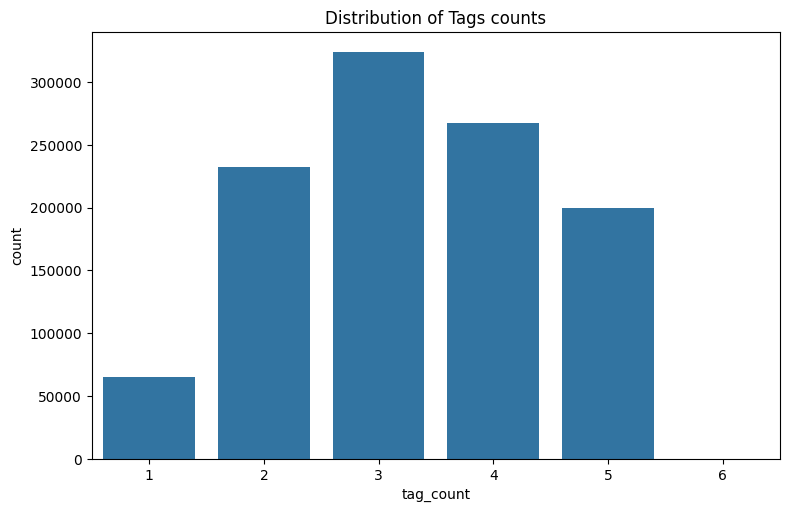

In [ ]:
# define figure size
fig = plt.figure(figsize=(8,5))
# countplot usinf seaborn
sns.countplot(x='tag_count',data=final_deduplicate_df)
# for better visulization use tight layout
plt.tight_layout()
# title of the plot
plt.title('Distribution of Tags counts')
# showing plot
plt.show()

### Observation:
 1. By watching above plot we can observe that most of the questions have 3 or 2 tags, and very small amount of questions have only 1 tag in it.
 2.Question with 1 and 5 tags are almost same.
 3. Maximum number of tag in any question is 5.
 4. Minimum number of tag in any question is 1.

#### Analysis on unique tags and Most frequent tag

In [ ]:
# import CountVectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer
# instantiate object to do count of tags
CV = CountVectorizer(tokenizer = lambda x : x.split('|'))
# Bag of words for tags with frequencies of each tag
tag_bag_words = CV.fit_transform(final_deduplicate_df['tags'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
tag_bag_words.shape

(1088418, 28185)

In [ ]:
print('Total Number of Unique Tags',tag_bag_words.shape[1])

Total Number of Unique Tags 28185


In [ ]:
# taking sum of each tags
# below line will sum the each column of sparce matrix and A1 converts matrix into array
tag_column_sum = tag_bag_words.sum(axis=0).A1
# make dictionary of each unique tag frequency count
tag_freq_count = dict(zip(CV.get_feature_names_out(),tag_column_sum))
# sort above dict in Descending order of tag count
tag_freq_count_sorted = dict(sorted(tag_freq_count.items(), key = lambda x: x[1], reverse = True))

In [ ]:
# top 10 most frequent tags
list(tag_freq_count_sorted.items())[:10]

[('javascript', 609751),
 ('java', 468638),
 ('jquery', 153590),
 ('html', 127536),
 ('android', 73559),
 ('css', 55338),
 ('reactjs', 44112),
 ('node.js', 40226),
 ('arrays', 37794),
 ('php', 34464)]

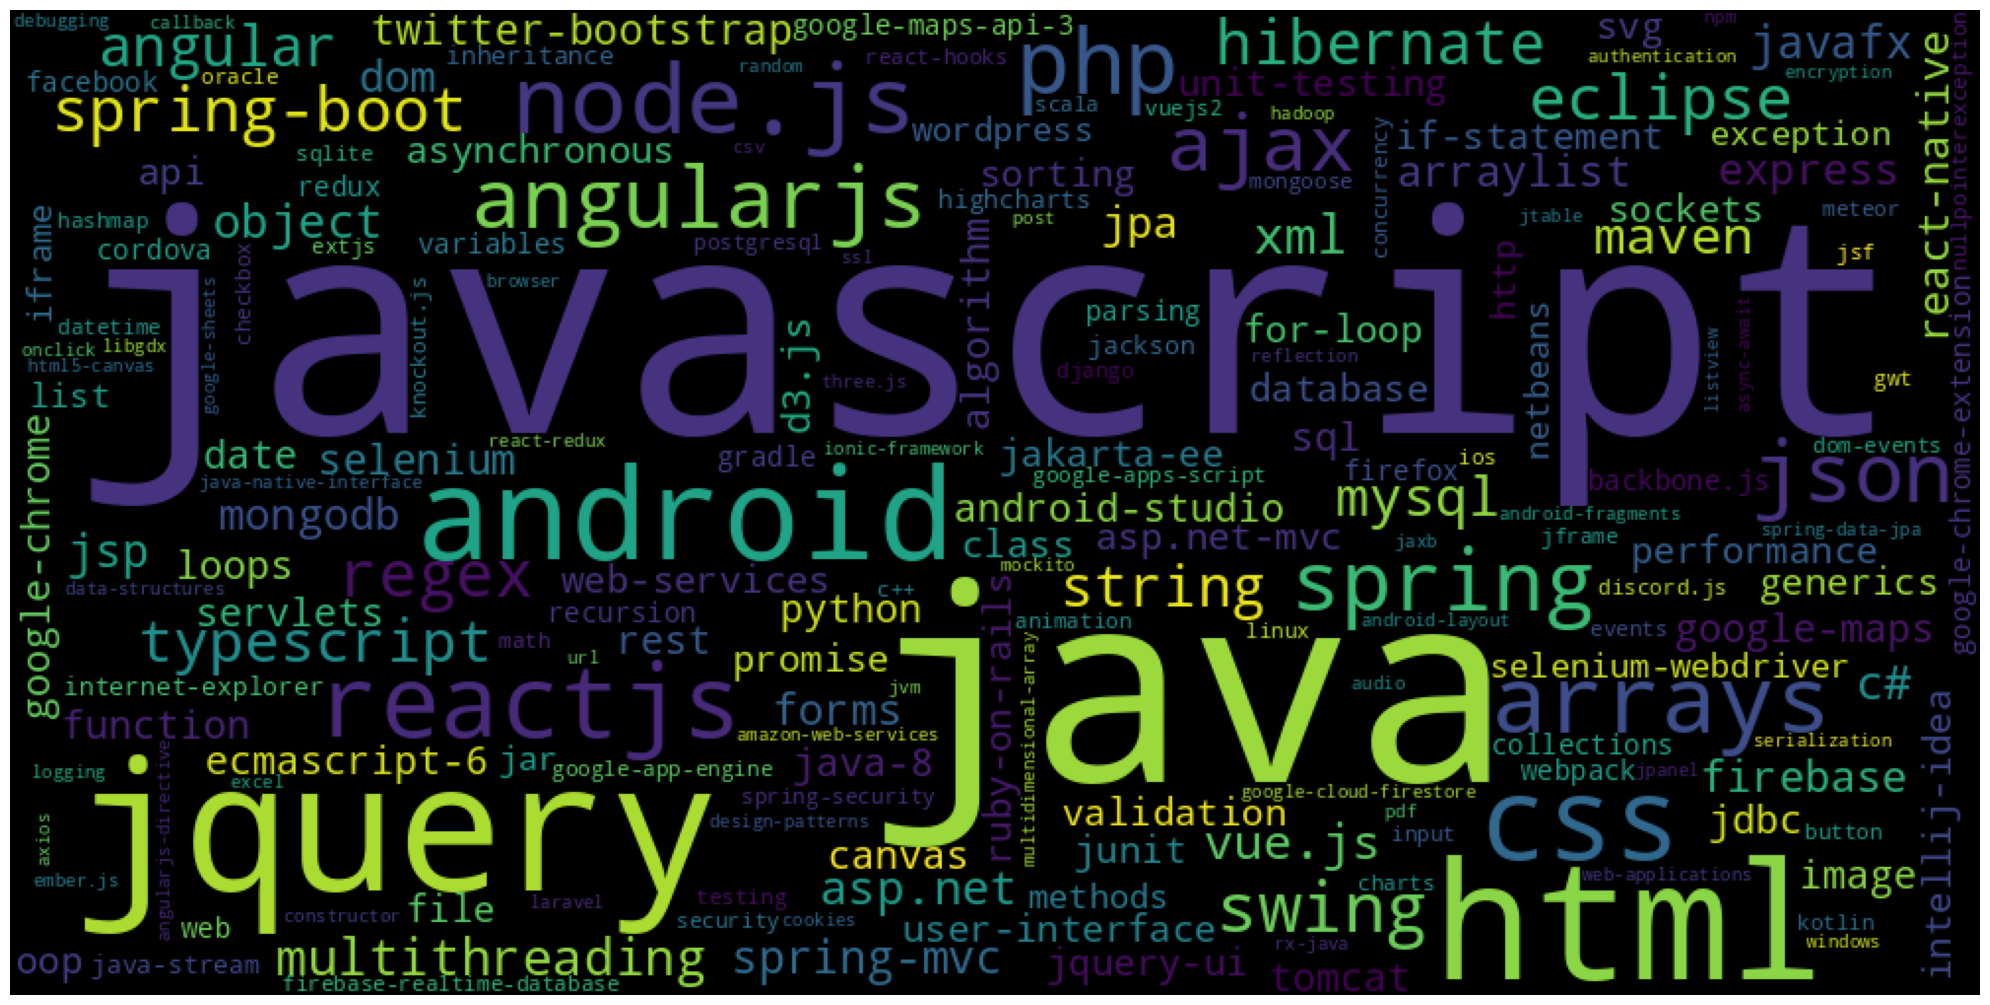

In [ ]:
# generate wordcloud from frequencies of tag counts
# Reference : https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
from wordcloud import WordCloud
Wcloud = WordCloud(width=1000,height=500)
Wcloud.generate_from_frequencies(tag_freq_count)
plt.figure(figsize=(20,20))
plt.imshow(Wcloud)
plt.axis('off')
plt.tight_layout()
plt.show()

#### Observation
 1. From above word cloud we can observ that size of Python word is very big that means **javascript** is most frequent word.
 2. Java is second most frequent word and python and c# is 3rd and 4th most frequent words.


#### Bar Plot of Top 10 tags vs frquency

In [ ]:
tags = list(tag_freq_count_sorted.keys())[:15]
freq = list(tag_freq_count_sorted.values())[:15]

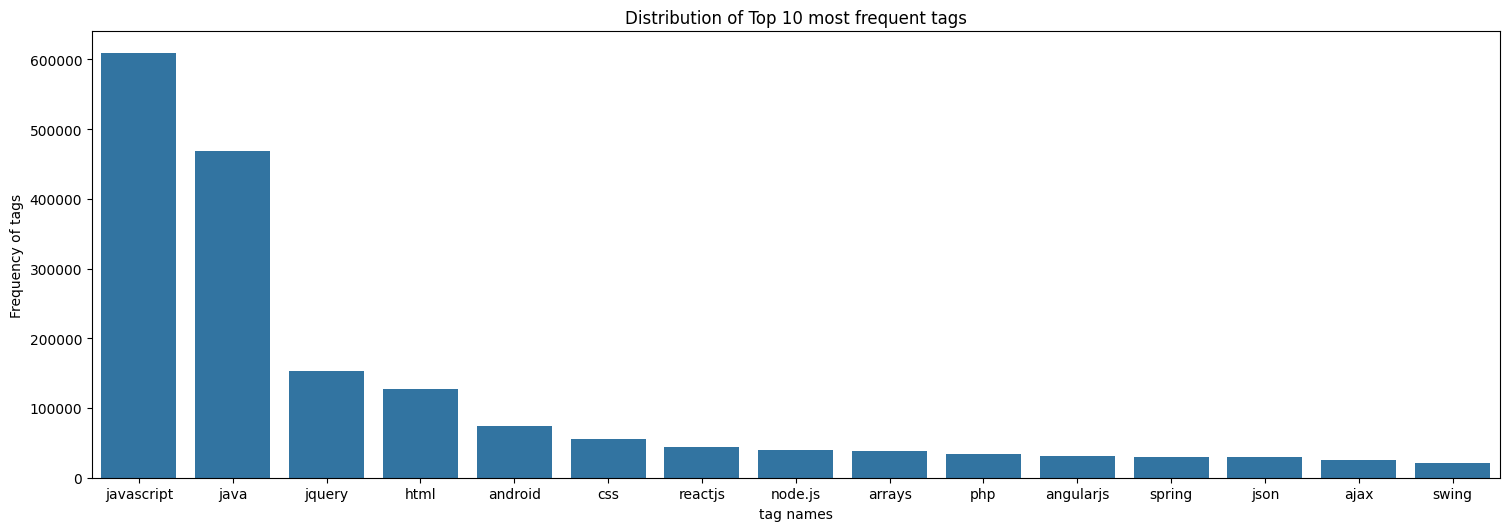

In [ ]:
# define figure size
fig = plt.figure(figsize=(15,5))
# Barplot using seaborn
sns.barplot(x=tags,y=freq)
# for better visulization use tight layout
plt.tight_layout()
# title of the plot
plt.title('Distribution of Top 10 most frequent tags')
plt.xlabel('tag names')
plt.ylabel('Frequency of tags')
# showing plot
plt.show()

###Observation
* Most frequent tags are javascript and java and python


#### Plot for frequency distribution

Text(12.097222222222216, 0.5, 'frequency')

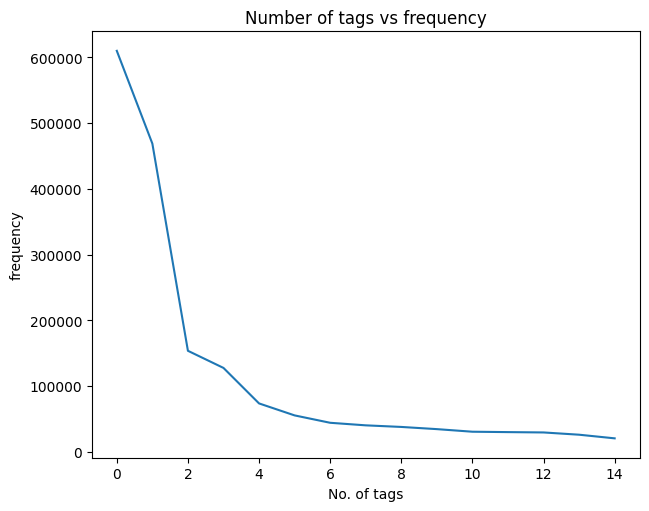

In [ ]:
plt.plot(freq)
plt.tight_layout()
plt.title('Number of tags vs frequency')
plt.xlabel('No. of tags')
plt.ylabel('frequency')

#### Obseravtion
* From above plot we can observe that there are very few tags whose frequency is very high, Actually we have seen that in bar plot that only javascript tag is most frequent.
* Except javascript tag all other tags frequenct is below 50000.
* Two tags(python and c#) have frequency is around 40,000.

### countplot for Voting Score

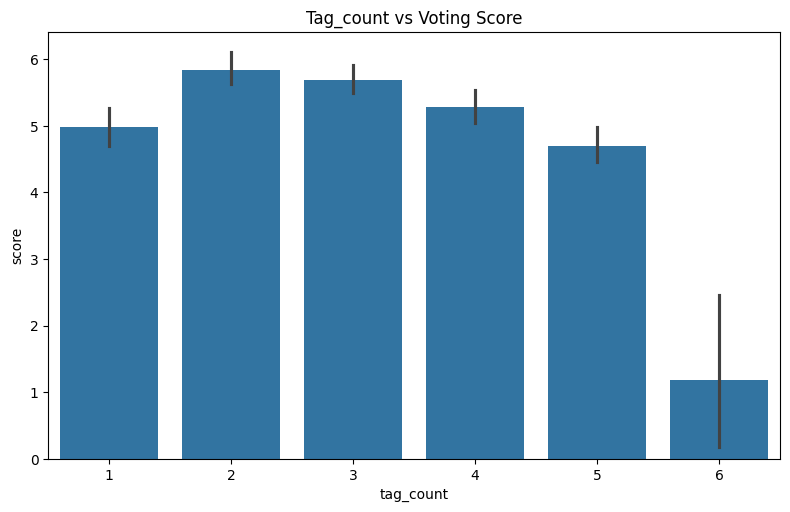

In [ ]:
# define figure size
fig = plt.figure(figsize=(8,5))
# Barplot using seaborn
sns.barplot(x=final_deduplicate_df['tag_count'],y=final_deduplicate_df['score'])
# for better visulization use tight layout
plt.tight_layout()
# title of the plot
plt.title('Tag_count vs Voting Score')
# showing plot
plt.show()

#### Obseravtion
* From above plot we observes that question with  6 tag count has very low voting score.
* Questions with tag count 4 has highest rating amontgst all
* Questions with 2,3 and 5 tag counts have almost same voting score.